In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\palux\Diplom\data\clean\vacancies_full.csv")

In [3]:
df

,id,employer_id,name,employer,area,published_at,salary_from,salary_to,salary_currency,experience,employment,schedule,key_skills,description,specializations,url,fetched_at
0,124729657,2942396.0,Системный аналитик в IT,СтандартПроект,Москва,2025-09-01T18:01:13+0300,NaN,NaN,NaN,От 1 года до 3 лет,Полная занятость,Полный день,['Системный анализ'],<p>Привет! Мы команда единомышленников и профе...,[],https://hh.ru/vacancy/124729657,2025-09-21 21:46:25.216968
1,125504633,NaN,Директор по продажам/Коммерческий директор (FMCG),"Федеральный производитель продуктов питания, о...",Москва,2025-09-18T23:41:15+0300,1000000.0,NaN,RUR,Более 6 лет,Полная занятость,Полный день,"['Стратегия продаж', 'Работа с федеральными се...",<p><strong>Директор по продажам/Коммерческий д...,[],https://hh.ru/vacancy/125504633,2025-09-21 21:46:25.428748
2,125563298,6030188.0,Исполнительный директор (CEO),Careerexpert,Москва,2025-09-20T23:37:59+0300,300000.0,400000.0,RUR,Более 6 лет,Полная занятость,Полный день,"['Управление командой', 'Оптимизация бизнес-пр...","<p>Агентство маркетинговых коммуникаций, осуще...",[],https://hh.ru/vacancy/125563298,2025-09-21 21:46:25.655461
3,125143584,5168378.0,Менеджер по работе с маркетплейсом OZON,Кучер Олег Леонидович,Москва,2025-09-19T11:21:31+0300,70000.0,110000.0,RUR,Нет опыта,Проектная работа,Удаленная работа,"['Аналитика маркетплейсов', 'Аналитическое мыш...","<p>Мы ищем человека, который возьмёт на себя п...",[],https://hh.ru/vacancy/125143584,2025-09-21 21:46:25.877064
4,125246320,330.0,Менеджер по корпоративным проектам,Nestle,Москва,2025-09-19T09:36:29+0300,NaN,NaN,NaN,От 3 до 6 лет,Полная занятость,Полный день,"['Управление проектами', 'Разработка бизнес-тр...",<p><em>Департамент по корпоративным делам и ма...,[],https://hh.ru/vacancy/125246320,2025-09-21 21:46:26.154474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,125523023,12224152.0,BI-аналитик,Цифровые легенды,Москва,2025-09-19T11:39:05+0300,NaN,NaN,NaN,От 3 до 6 лет,Полная занятость,Полный день,[],<p><strong>«Цифровые легенды» </strong>— ведущ...,[],https://hh.ru/vacancy/125523023,2025-09-21 21:47:29.009687
246,125329835,4137076.0,Аналитик данных / Актуарий,Объединенная Консалтинговая Группа,Москва,2025-09-15T13:06:47+0300,130000.0,NaN,RUR,От 1 года до 3 лет,Полная занятость,Удаленная работа,[],<strong>Обязанности:</strong> <p>Анализ страхо...,[],https://hh.ru/vacancy/125329835,2025-09-21 21:47:29.215992
247,125542868,785095.0,Системный аналитик,Альфа-Лизинг,Москва,2025-09-19T17:27:37+0300,NaN,NaN,NaN,От 3 до 6 лет,Полная занятость,Удаленная работа,"['API', 'BPMN', 'REST', 'REST API', 'SOAP', 'U...",<p><strong>Альфа-Лизинг</strong> - это простра...,[],https://hh.ru/vacancy/125542868,2025-09-21 21:47:29.487219
248,124642268,3367886.0,Аналитик,AYA Group,Москва,2025-08-29T15:13:16+0300,NaN,NaN,NaN,От 3 до 6 лет,Полная занятость,Удаленная работа,NaN,NaN,NaN,https://hh.ru/vacancy/124642268,2025-09-21 21:47:29.706282


In [4]:
df['experience'].value_counts()

experience
От 1 года до 3 лет    113
От 3 до 6 лет          84
Нет опыта              34
Более 6 лет            19
Name: count, dtype: int64

In [5]:
df['schedule'].value_counts()

schedule
Полный день         135
Удаленная работа    114
Сменный график        1
Name: count, dtype: int64

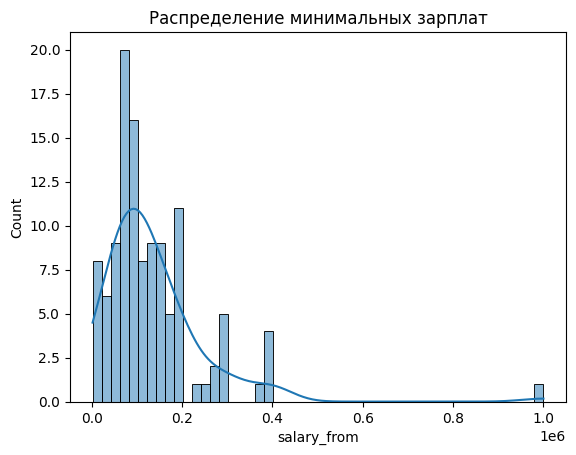

In [6]:
sns.histplot(df['salary_from'], bins=50, kde=True)
plt.title('Распределение минимальных зарплат')
plt.show()

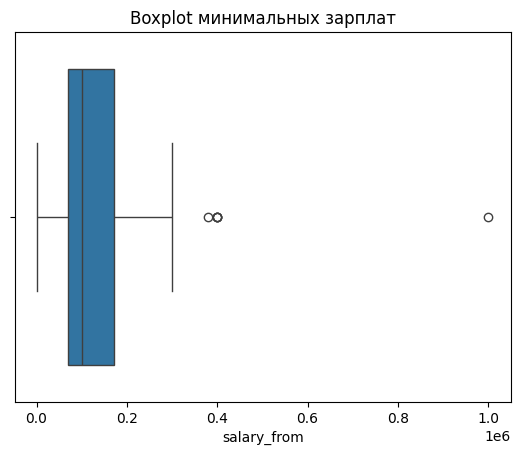

In [7]:
sns.boxplot(x=df['salary_from'])
plt.title('Boxplot минимальных зарплат')
plt.show()

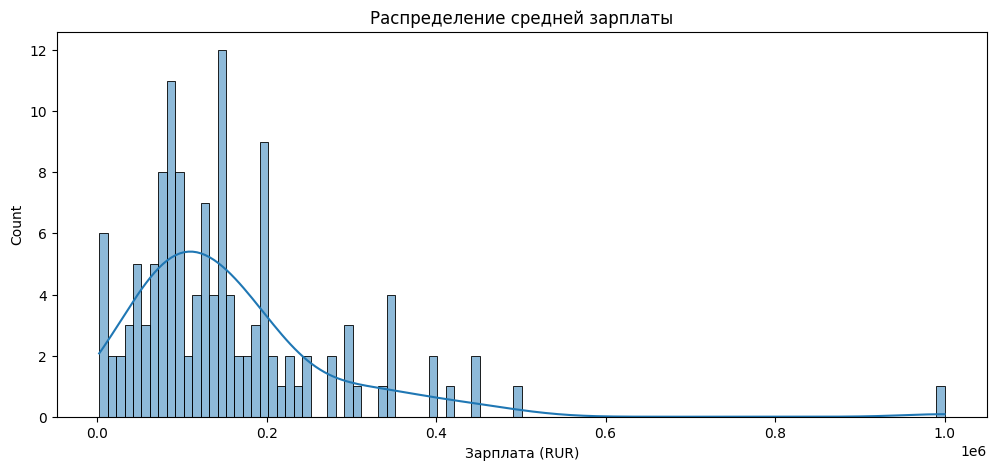

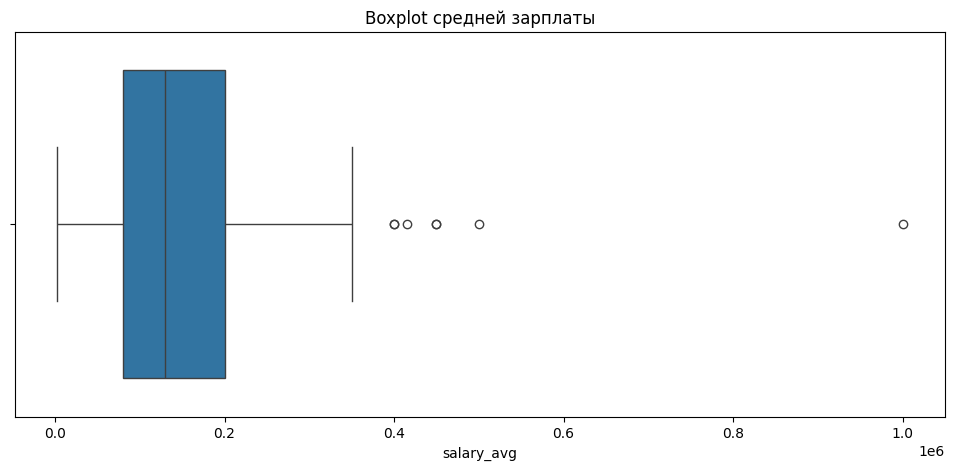

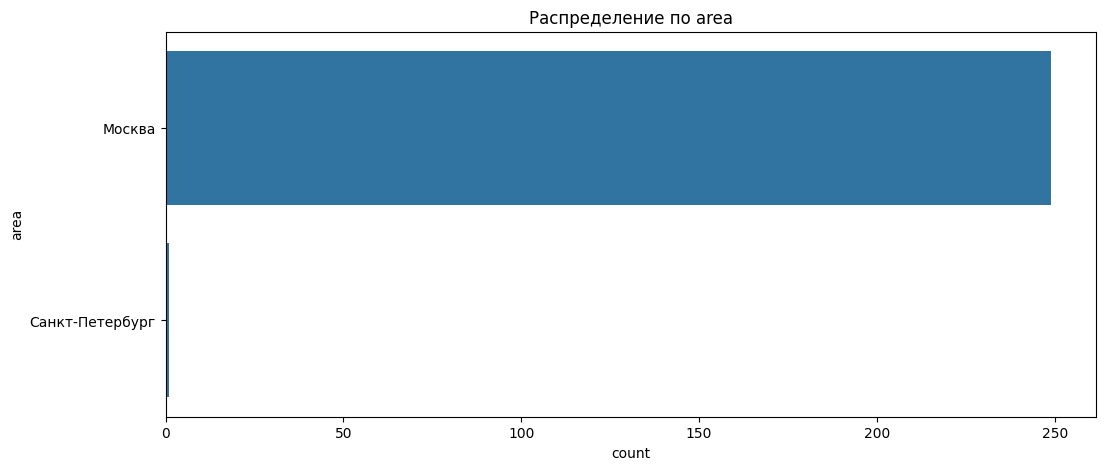

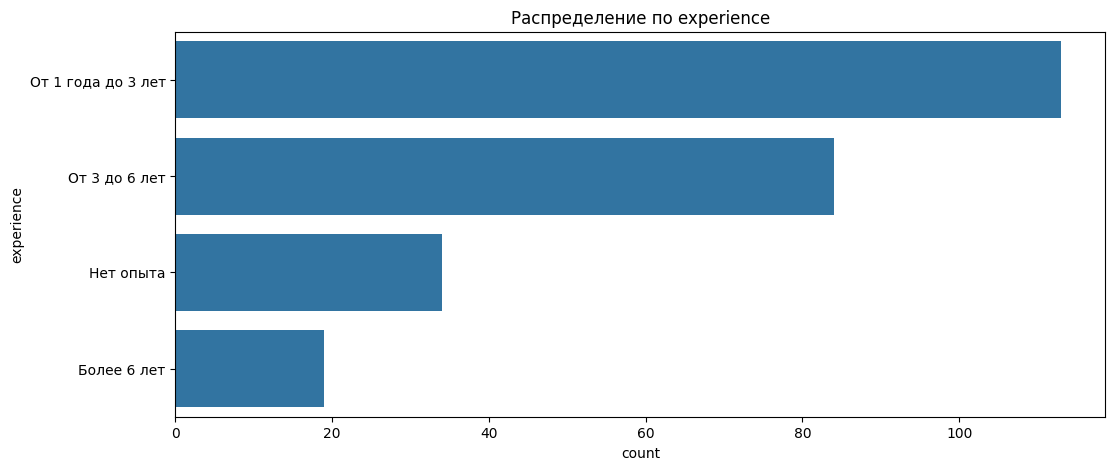

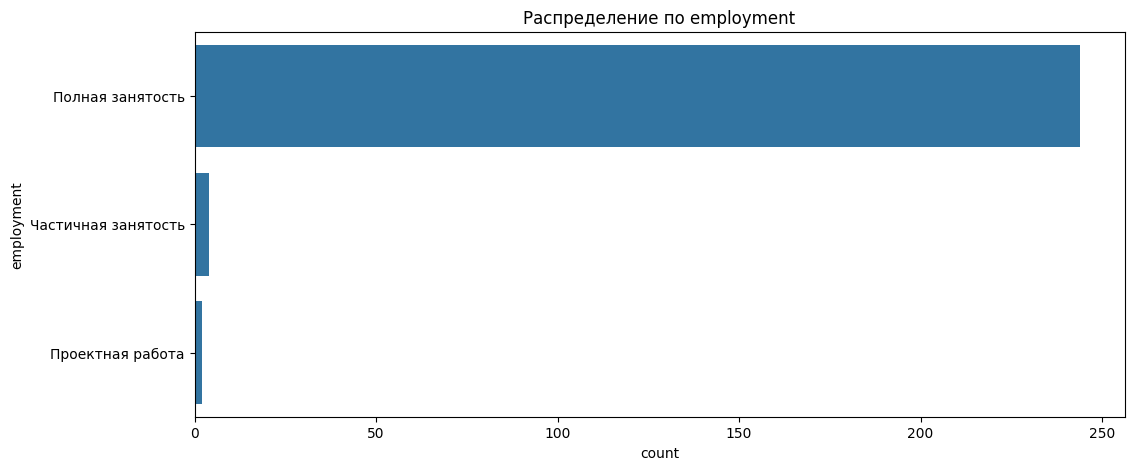

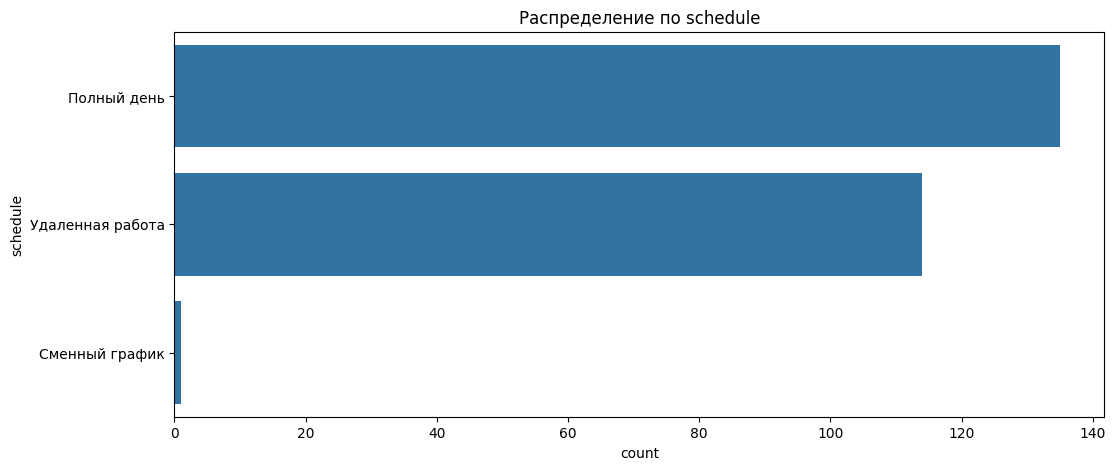

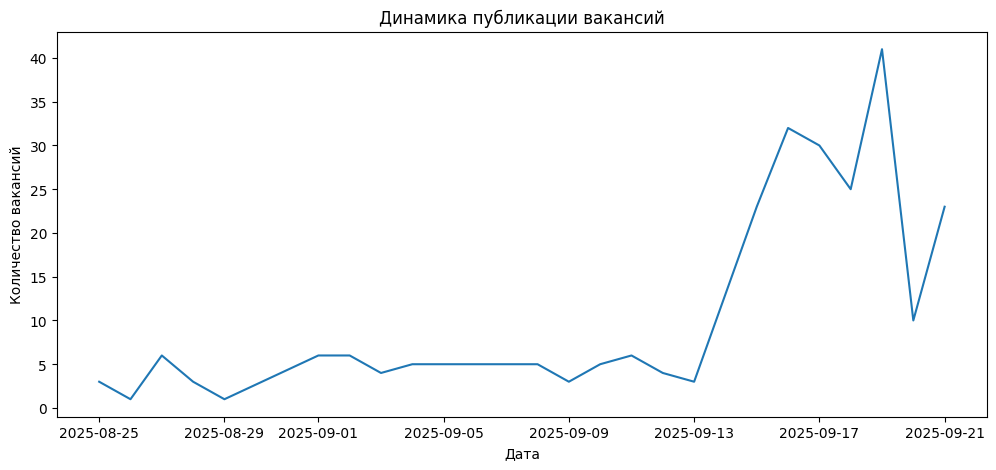

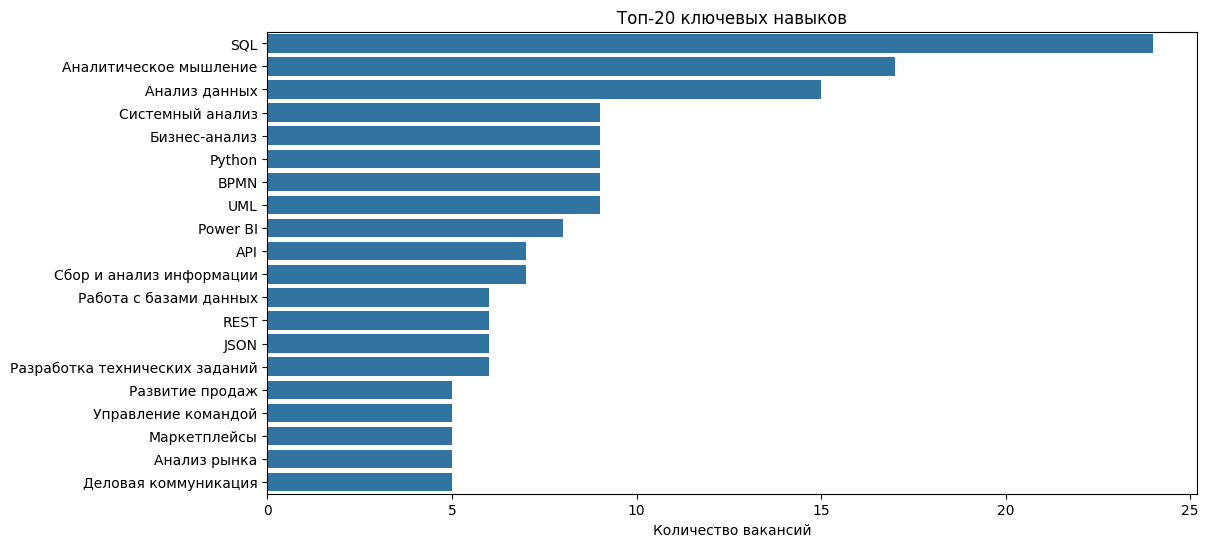

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

# 1. Чтение файла (обрати внимание на слеши для Windows)
df = pd.read_csv(r"C:\Users\palux\Diplom\data\clean\vacancies_full.csv")

# 2. Преобразуем даты
df['published_at'] = pd.to_datetime(df['published_at'])
df['fetched_at'] = pd.to_datetime(df['fetched_at'])

# 3. Создаем среднюю зарплату
df['salary_avg'] = df[['salary_from', 'salary_to']].mean(axis=1)

# 4. Преобразуем ключевые навыки из строкового формата в список
df['key_skills'] = df['key_skills'].apply(lambda x: literal_eval(x) if pd.notna(x) else [])

# --- РАСПРЕДЕЛЕНИЯ ---

# A. Числовые: зарплаты
plt.figure(figsize=(12,5))
sns.histplot(df['salary_avg'], bins=100, kde=True)
plt.title('Распределение средней зарплаты')
plt.xlabel('Зарплата (RUR)')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=df['salary_avg'])
plt.title('Boxplot средней зарплаты')
plt.show()

# B. Категориальные: города, опыт, занятость
for col in ['area', 'experience', 'employment', 'schedule']:
    plt.figure(figsize=(12,5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Распределение по {col}')
    plt.show()

# C. Временные: вакансии по дате
plt.figure(figsize=(12,5))
df['published_at'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Динамика публикации вакансий')
plt.xlabel('Дата')
plt.ylabel('Количество вакансий')
plt.show()

# D. Навыки: топ-20
from collections import Counter
all_skills = [skill for sublist in df['key_skills'] for skill in sublist]
top_skills = Counter(all_skills).most_common(20)
skills, counts = zip(*top_skills)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(skills))
plt.title('Топ-20 ключевых навыков')
plt.xlabel('Количество вакансий')
plt.show()
